# Loading the data

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("data/1.5k_Data_Set.csv", encoding="utf-8")

# Display the first few rows to verify the data
print("First few rows of the dataset:")
df.head()

print("\nShape of the dataset:")
print(df.shape)

First few rows of the dataset:

Shape of the dataset:
(4028, 18)


## Cleaning to not have any empty values

In [38]:
# Drop rows with any empty values (NaN)
df = df.dropna()


# Display the shape of the cleaned dataset
print("\nShape of the dataset after cleaning:")
print(df.shape)


Shape of the dataset after cleaning:
(2250, 18)


# Analyzing

In [39]:
# Lets analyze the distribution of the data
print("\nDistribution of the data:")
print(df.describe())


Distribution of the data:
           quality       growth        value     dividend  market_cap_usd  \
count  2250.000000  2250.000000  2250.000000  2250.000000    2.250000e+03   
mean     64.097629    45.525510    53.566569    59.725688    1.093571e+10   
std      14.507587    29.979487    22.734107    25.040164    8.342002e+10   
min      23.658197     0.000000     0.000000     0.000000    1.555561e+06   
25%      53.764266    20.695660    37.380224    41.400000    2.008896e+08   
50%      65.796592    46.003544    54.847786    62.285302    8.434978e+08   
75%      74.608358    68.497845    71.047549    81.832325    3.163698e+09   
max      98.889835   100.000000   100.000000   100.000000    1.740172e+12   

       enterprise_value_usd        volume    profit_1m    profit_3m  \
count          2.250000e+03  2.250000e+03  2250.000000  2250.000000   
mean           1.247889e+10  4.294434e+06     0.013930     0.027300   
std            8.434909e+10  3.631822e+07     0.115365     0.18756

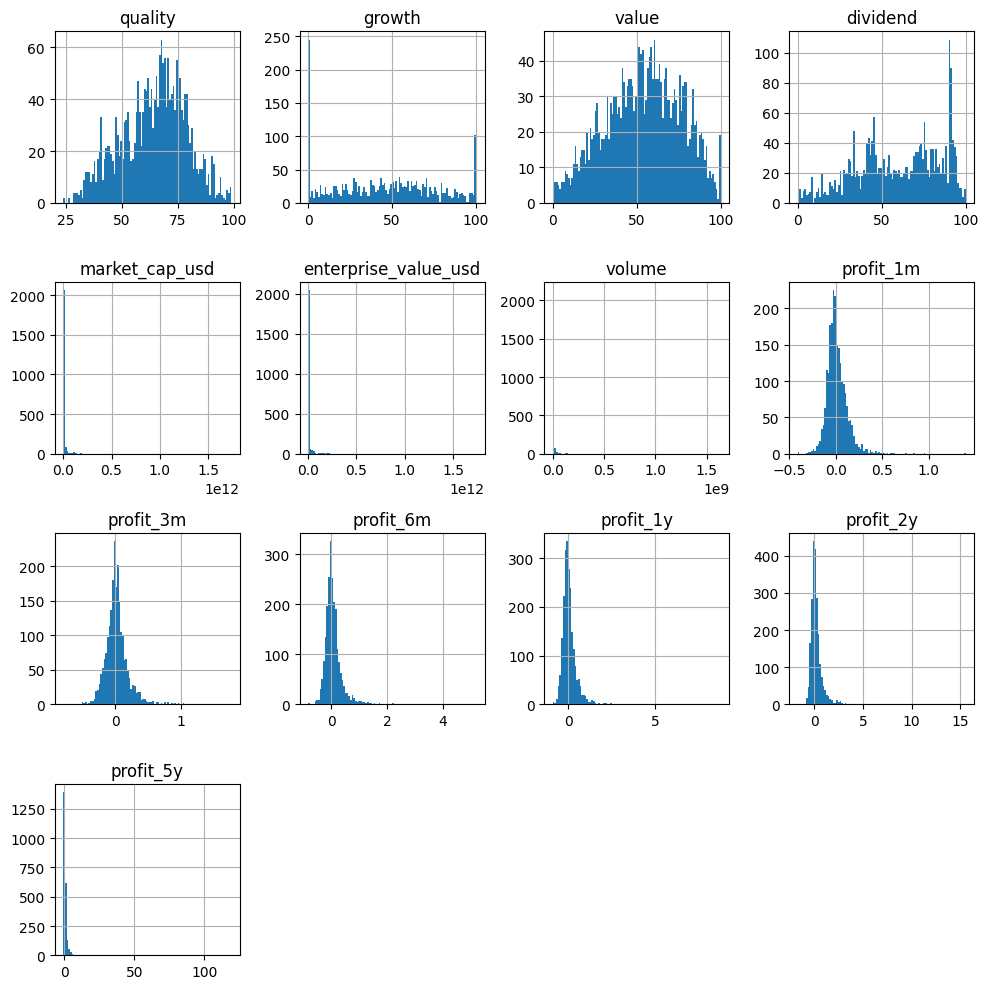

<Figure size 1920x1440 with 0 Axes>

In [ ]:
# distribution of the data
df.hist(figsize=(10, 10), bins=100)
plt.tight_layout()  # Adjust spacing between subplots
plt.show(block=False)  # Show plot without blocking
plt.gcf().set_dpi(300)  # Increase DPI for higher resolution


# Create a normalized version of the dataframe
# Select only numeric columns
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns

# Normalize only numeric columns
df_normalized = df.copy()
for column in numeric_columns:
    df_normalized[column] = (
        2 * ((df[column] - df[column].min()) / (df[column].max() - df[column].min()))
        - 1
    )

### Deeper plots

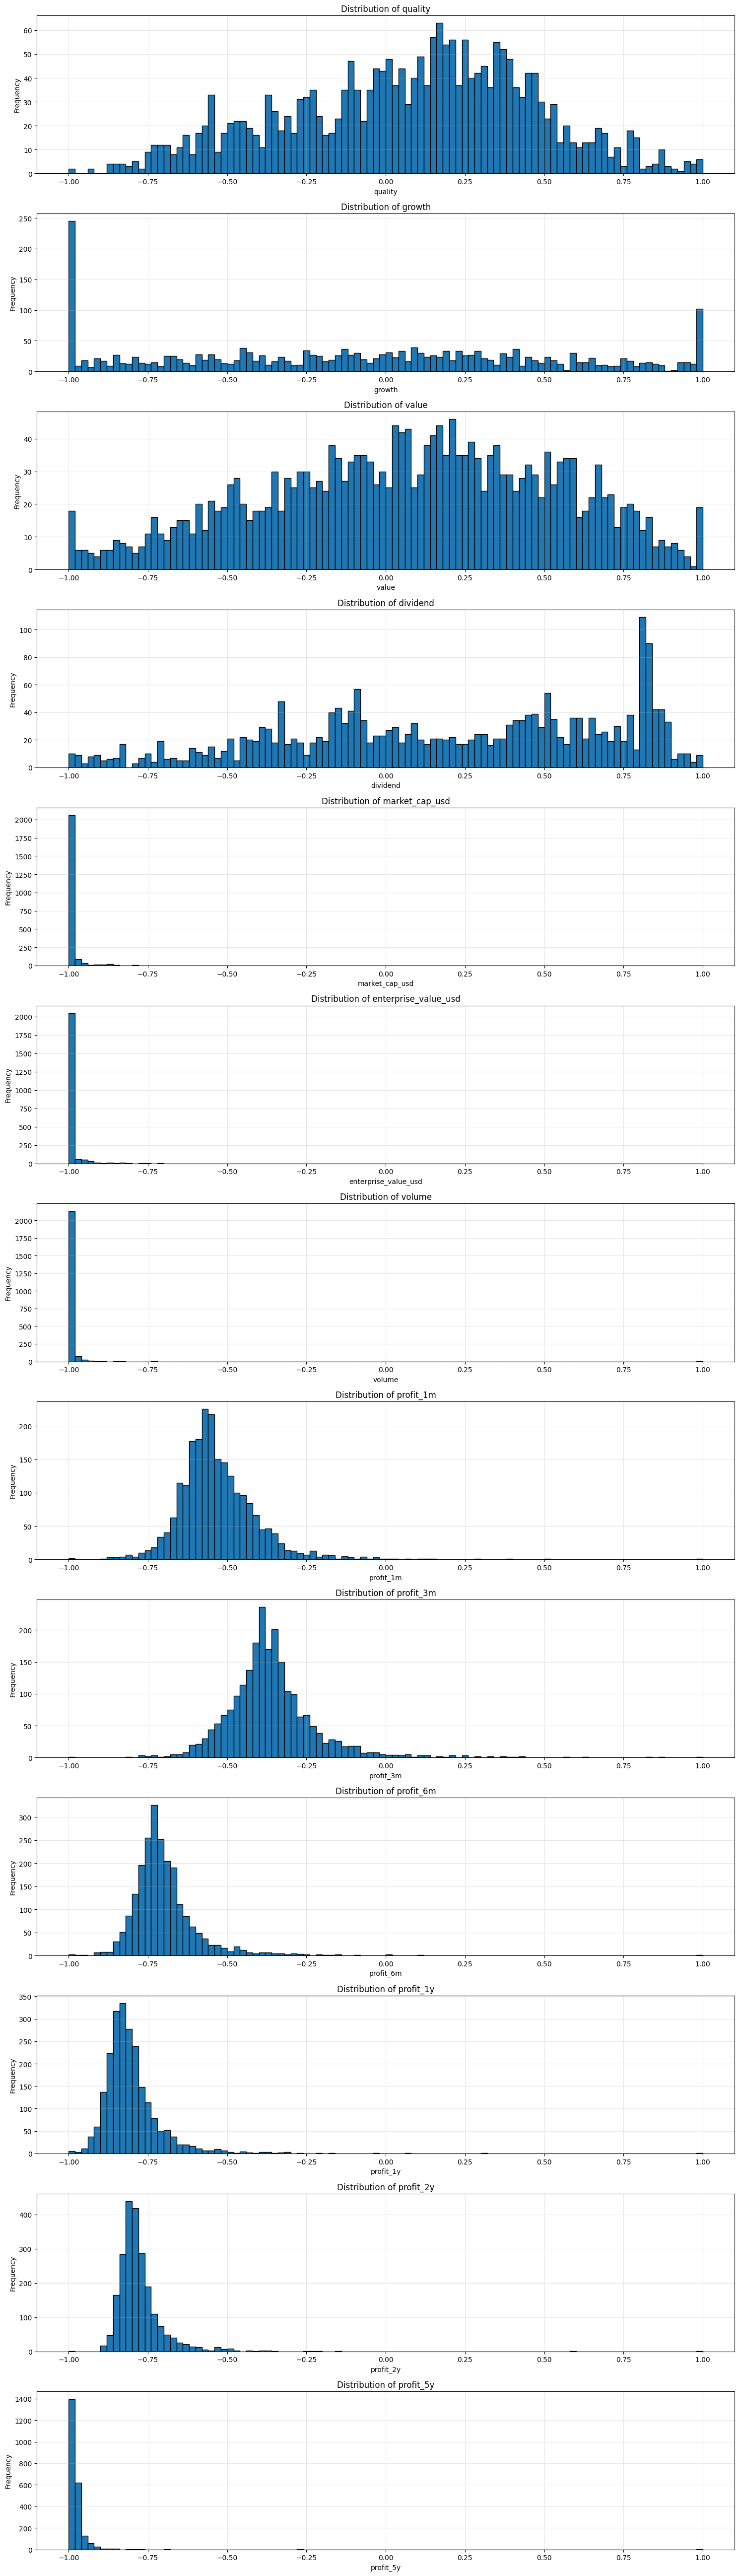

In [ ]:
# Create individual histograms for each numeric column
plt.figure(
    figsize=(15, len(numeric_columns) * 4)
)  # Adjust figure size based on number of columns

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)
    plt.hist(df_normalized[column], bins=100, edgecolor="black")
    # plt.hist(df[column], bins=100, edgecolor="black") # Note: change this for original data

    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Excluding outliers

Number of outliers removed: 311


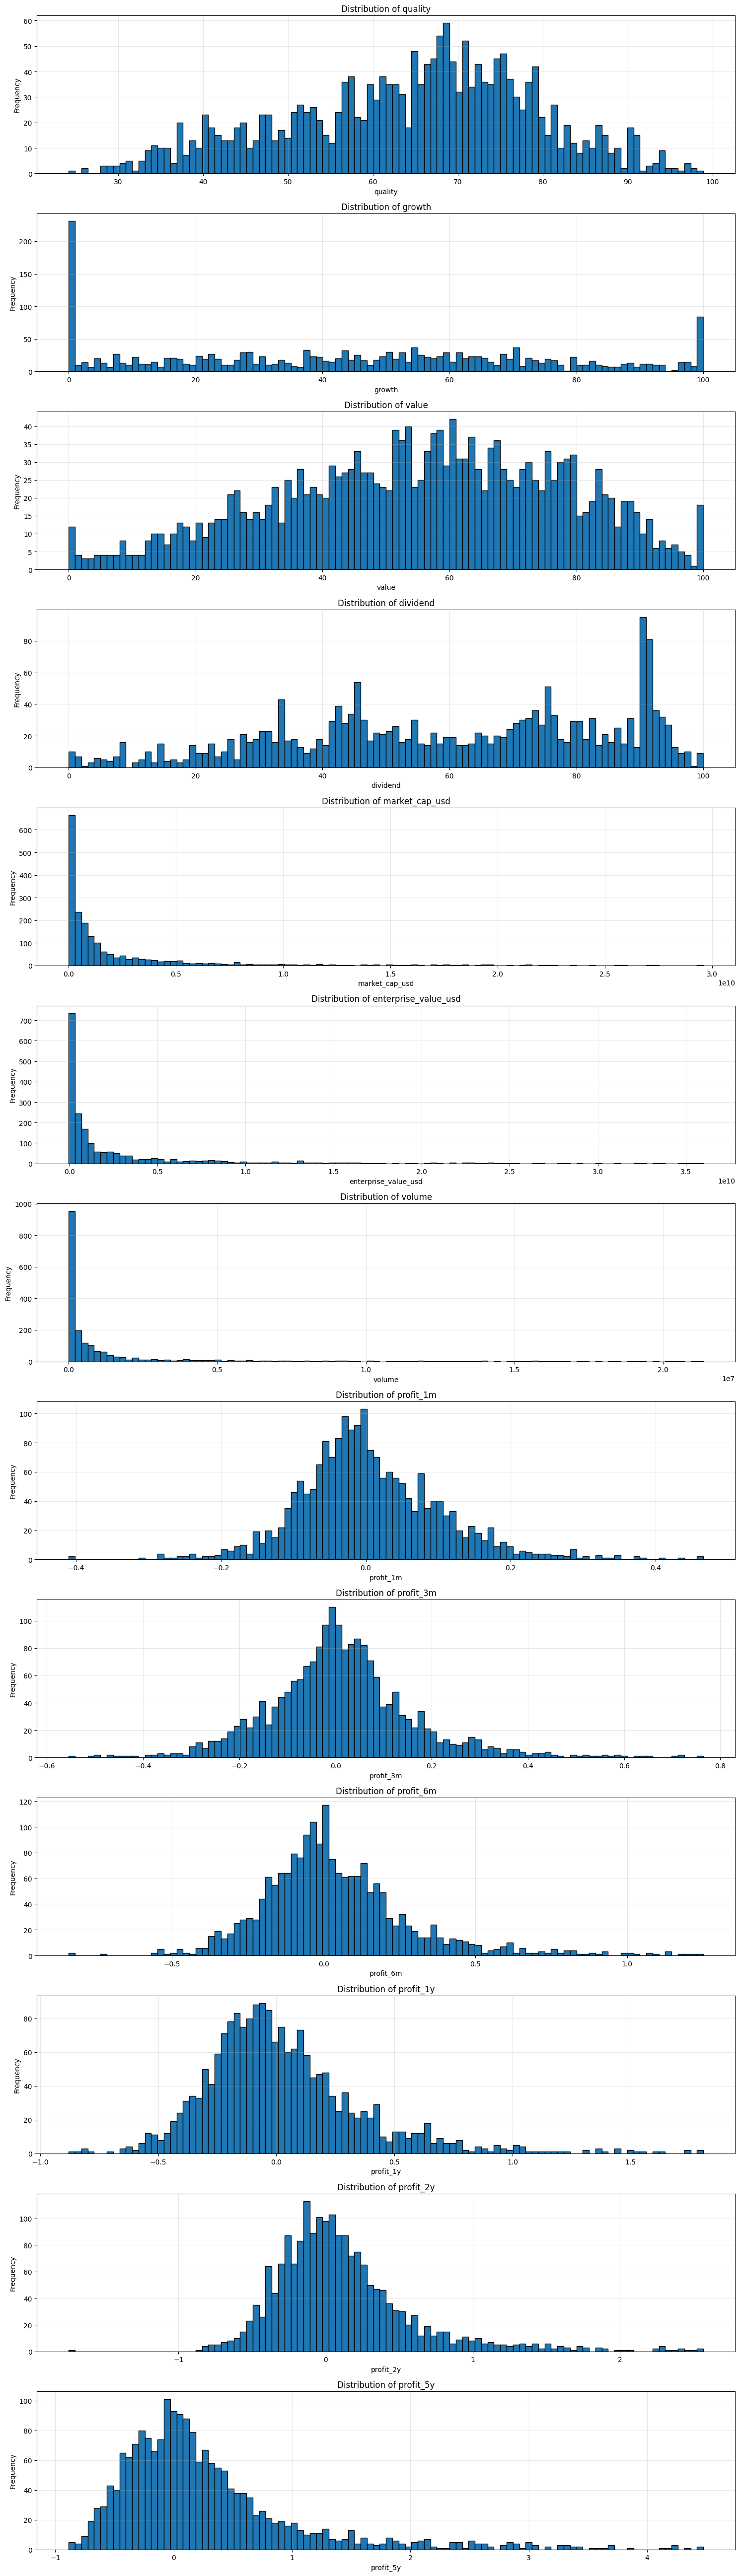

In [62]:
# Exclude outliers from market cap, and profits
# Calculate Q1, Q3, and IQR for market cap and profits
exclude_outliers = 0.1  # % of outliers to exclude

# market cap
Q1_market_cap = df["market_cap_usd"].quantile(exclude_outliers)
Q3_market_cap = df["market_cap_usd"].quantile(1 - exclude_outliers)
IQR_market_cap = Q3_market_cap - Q1_market_cap

# enterprise value
Q1_enterprise_value = df["enterprise_value_usd"].quantile(exclude_outliers)
Q3_enterprise_value = df["enterprise_value_usd"].quantile(1 - exclude_outliers)
IQR_enterprise_value = Q3_enterprise_value - Q1_enterprise_value

# volume
Q1_volume = df["volume"].quantile(exclude_outliers)
Q3_volume = df["volume"].quantile(1 - exclude_outliers)
IQR_volume = Q3_volume - Q1_volume

# Profits

Q1_profit_1m = df["profit_1m"].quantile(exclude_outliers)
Q1_profit_3m = df["profit_3m"].quantile(exclude_outliers)
Q1_profit_6m = df["profit_6m"].quantile(exclude_outliers)
Q1_profit_1y = df["profit_1y"].quantile(exclude_outliers)
Q1_profit_2y = df["profit_2y"].quantile(exclude_outliers)
Q1_profit_5y = df["profit_5y"].quantile(exclude_outliers)
Q3_profit_1m = df["profit_1m"].quantile(1 - exclude_outliers)
Q3_profit_3m = df["profit_3m"].quantile(1 - exclude_outliers)
Q3_profit_6m = df["profit_6m"].quantile(1 - exclude_outliers)
Q3_profit_1y = df["profit_1y"].quantile(1 - exclude_outliers)
Q3_profit_2y = df["profit_2y"].quantile(1 - exclude_outliers)
Q3_profit_5y = df["profit_5y"].quantile(1 - exclude_outliers)


# Define bounds for outliers (using 1.5 * IQR rule)
lower_bound_market_cap = Q1_market_cap - 1.5 * IQR_market_cap
upper_bound_market_cap = Q3_market_cap + 1.5 * IQR_market_cap

lower_bound_enterprise_value = Q1_enterprise_value - 1.5 * IQR_enterprise_value
upper_bound_enterprise_value = Q3_enterprise_value + 1.5 * IQR_enterprise_value

lower_bound_volume = Q1_volume - 1.5 * IQR_volume
upper_bound_volume = Q3_volume + 1.5 * IQR_volume


lower_bound_profit_1m = Q1_profit_1m - 1.5 * (Q3_profit_1m - Q1_profit_1m)
lower_bound_profit_3m = Q1_profit_3m - 1.5 * (Q3_profit_3m - Q1_profit_3m)
lower_bound_profit_6m = Q1_profit_6m - 1.5 * (Q3_profit_6m - Q1_profit_6m)
lower_bound_profit_1y = Q1_profit_1y - 1.5 * (Q3_profit_1y - Q1_profit_1y)
lower_bound_profit_2y = Q1_profit_2y - 1.5 * (Q3_profit_2y - Q1_profit_2y)
lower_bound_profit_5y = Q1_profit_5y - 1.5 * (Q3_profit_5y - Q1_profit_5y)

upper_bound_profit_1m = Q3_profit_1m + 1.5 * (Q3_profit_1m - Q1_profit_1m)
upper_bound_profit_3m = Q3_profit_3m + 1.5 * (Q3_profit_3m - Q1_profit_3m)
upper_bound_profit_6m = Q3_profit_6m + 1.5 * (Q3_profit_6m - Q1_profit_6m)
upper_bound_profit_1y = Q3_profit_1y + 1.5 * (Q3_profit_1y - Q1_profit_1y)
upper_bound_profit_2y = Q3_profit_2y + 1.5 * (Q3_profit_2y - Q1_profit_2y)
upper_bound_profit_5y = Q3_profit_5y + 1.5 * (Q3_profit_5y - Q1_profit_5y)


# Create a new dataframe excluding outliers
df_no_outliers = df[
    (df["market_cap_usd"] >= lower_bound_market_cap)
    & (df["market_cap_usd"] <= upper_bound_market_cap)
    & (df["profit_1m"] >= lower_bound_profit_1m)
    & (df["profit_1m"] <= upper_bound_profit_1m)
    & (df["profit_3m"] >= lower_bound_profit_3m)
    & (df["profit_3m"] <= upper_bound_profit_3m)
    & (df["profit_6m"] >= lower_bound_profit_6m)
    & (df["profit_6m"] <= upper_bound_profit_6m)
    & (df["profit_1y"] >= lower_bound_profit_1y)
    & (df["profit_1y"] <= upper_bound_profit_1y)
    & (df["profit_2y"] >= lower_bound_profit_2y)
    & (df["profit_2y"] <= upper_bound_profit_2y)
    & (df["profit_5y"] >= lower_bound_profit_5y)
    & (df["profit_5y"] <= upper_bound_profit_5y)
    & (df["volume"] >= lower_bound_volume)
    & (df["volume"] <= upper_bound_volume)
    & (df["enterprise_value_usd"] >= lower_bound_enterprise_value)
    & (df["enterprise_value_usd"] <= upper_bound_enterprise_value)
]

# Print the shape before and after removing outliers
# print(f"Original dataset shape: {df.shape}")
# print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")
print(f"Number of outliers removed: {df.shape[0] - df_no_outliers.shape[0]}")

# New histograms to check the outliers
# Create histograms for each numeric column in the cleaned dataset
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)
    plt.hist(df_no_outliers[column], bins=100, edgecolor="black")
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

plt.tight_layout()

Data Retention:
Original records: 2,250
Cleaned records: 1,939
Retention rate: 86.18%

Comparison of key statistics:

quality:
Original mean: 64.10
Cleaned mean: 64.37
Original std: 14.51
Cleaned std: 14.45

growth:
Original mean: 45.53
Cleaned mean: 44.39
Original std: 29.98
Cleaned std: 30.08

value:
Original mean: 53.57
Cleaned mean: 55.14
Original std: 22.73
Cleaned std: 22.15

dividend:
Original mean: 59.73
Cleaned mean: 59.87
Original std: 25.04
Cleaned std: 24.90

market_cap_usd:
Original mean: 10,935,706,419.35
Cleaned mean: 2,164,502,678.22
Original std: 83,420,016,060.46
Cleaned std: 3,899,617,888.22

enterprise_value_usd:
Original mean: 12,478,887,046.07
Cleaned mean: 2,722,880,628.75
Original std: 84,349,088,818.52
Cleaned std: 5,113,979,066.12

volume:
Original mean: 4,294,434.20
Cleaned mean: 1,584,197.86
Original std: 36,318,219.02
Cleaned std: 3,433,724.96

profit_1m:
Original mean: 0.01
Cleaned mean: 0.01
Original std: 0.12
Cleaned std: 0.10

profit_3m:
Original mean: 

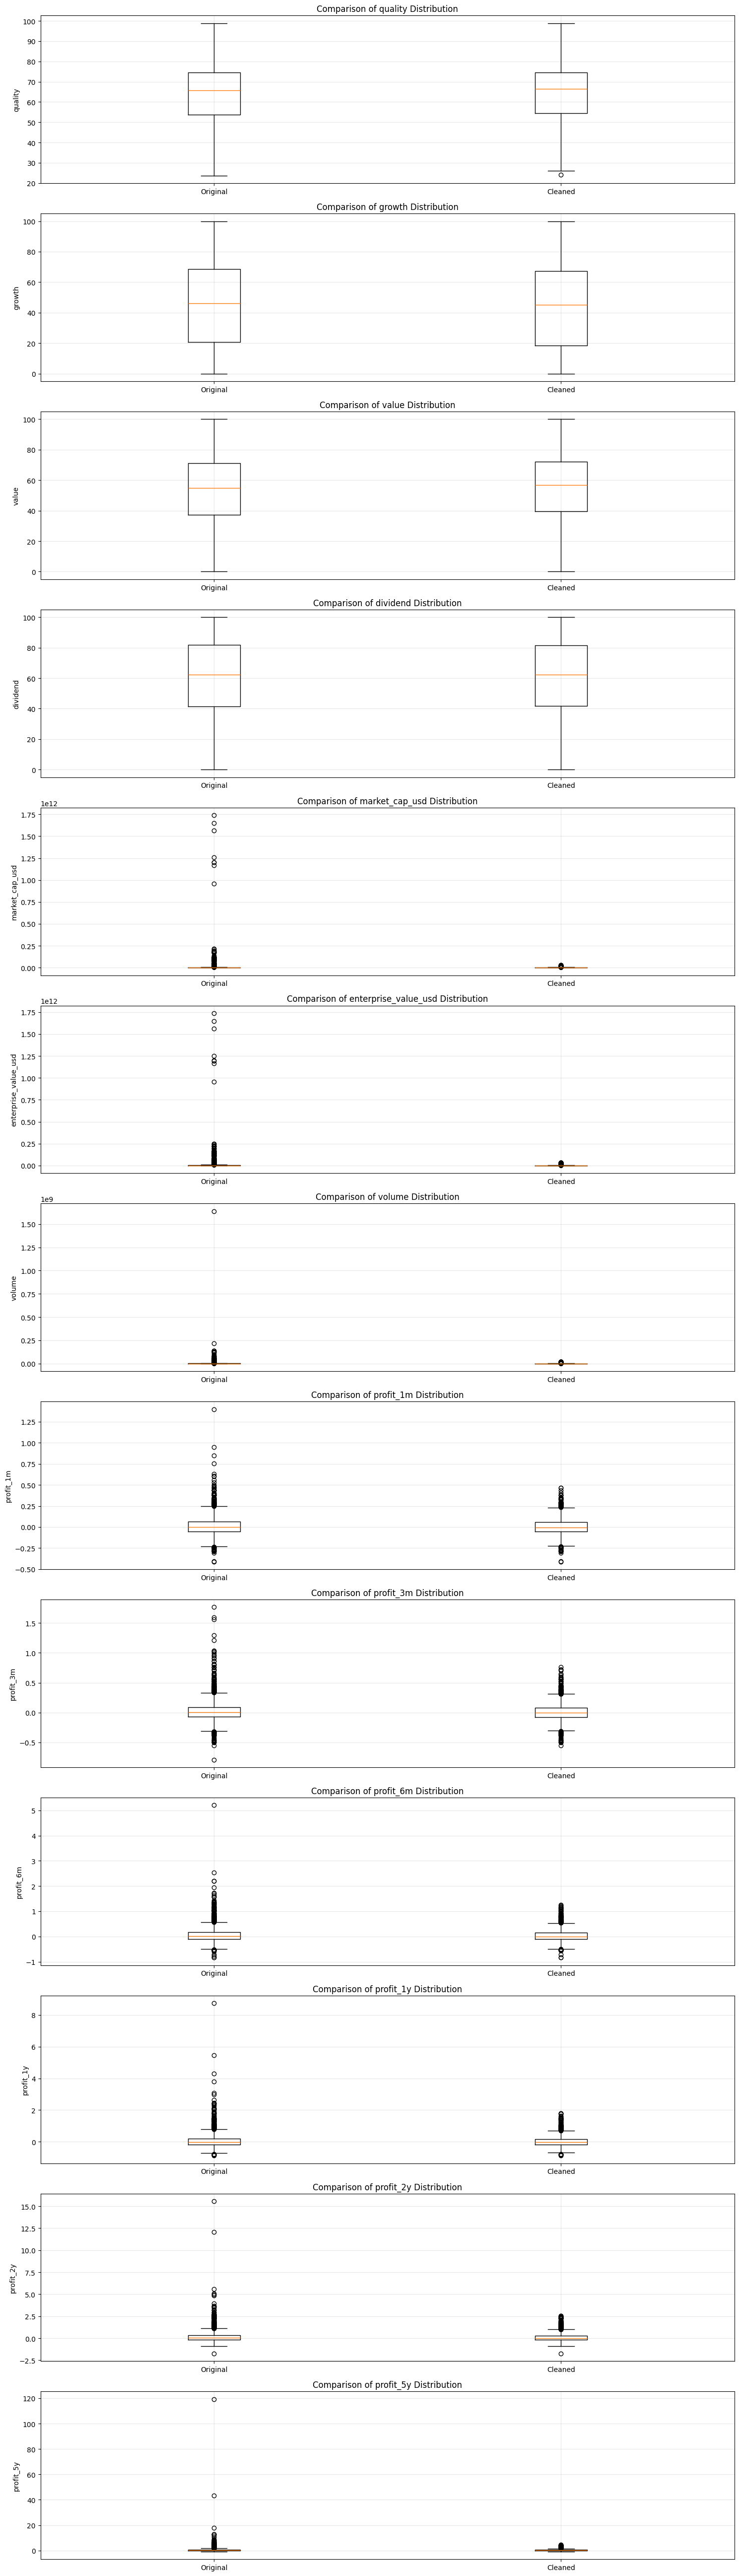

In [64]:
# Now compare the original and the cleaned data
# Create a new dataframe with the original data
df_original = df.copy()

# Create a new dataframe with the cleaned data
df_cleaned = df_no_outliers.copy()

# Calculate basic statistics for both datasets
original_stats = df_original.describe()
cleaned_stats = df_cleaned.describe()

# Calculate the percentage of data retained
retention_rate = (len(df_cleaned) / len(df_original)) * 100

print("Data Retention:")
print(f"Original records: {len(df_original):,}")
print(f"Cleaned records: {len(df_cleaned):,}")
print(f"Retention rate: {retention_rate:.2f}%\n")

# Compare means and standard deviations
print("Comparison of key statistics:")
for column in numeric_columns:
    print(f"\n{column}:")
    print(f"Original mean: {df_original[column].mean():,.2f}")
    print(f"Cleaned mean: {df_cleaned[column].mean():,.2f}")
    print(f"Original std: {df_original[column].std():,.2f}")
    print(f"Cleaned std: {df_cleaned[column].std():,.2f}")

# Create side-by-side box plots for visual comparison
plt.figure(figsize=(15, len(numeric_columns) * 4))

for idx, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns), 1, idx)

    # Create box plots
    box_data = [df_original[column], df_cleaned[column]]
    plt.boxplot(box_data, tick_labels=["Original", "Cleaned"])

    plt.title(f"Comparison of {column} Distribution")
    plt.ylabel(column)
    plt.grid(True, alpha=0.3)

plt.tight_layout()